Enter total number of domain steps:   100


number of steps and H are 100 0.01


Enter total time:  0.001


We recommend a time step as 0.5*h^2 such as 0.000050


Enter time step (0 to stop):  0.00006


time step and time are: 0.00006 0.001
[0.         0.00270776 0.00549115 0.00842643 0.01159111 0.01506451
 0.01892825 0.02326657 0.02816666 0.03371866 0.04001562 0.0471532
 0.05522918 0.0643427  0.07459329 0.08607969 0.09889833 0.11314169
 0.12889633 0.14624082 0.16524344 0.18595977 0.20843027 0.2326777
 0.25870478 0.28649179 0.31599451 0.34714233 0.37983677 0.41395038
 0.4493262  0.48577772 0.52308947 0.56101825 0.59929504 0.63762762
 0.67570374 0.71319502 0.7497614  0.78505605 0.81873066 0.85044114
 0.87985333 0.90664887 0.93053087 0.95122941 0.96850657 0.98216103
 0.99203191 0.99800199 1.         0.99800199 0.99203191 0.98216103
 0.96850657 0.95122941 0.93053087 0.90664887 0.87985333 0.85044114
 0.81873066 0.78505605 0.7497614  0.71319502 0.67570374 0.63762762
 0.59929504 0.56101825 0.52308947 0.48577772 0.4493262  0.41395038
 0.37983677 0.34714233 0.31599451 0.28649179 0.25870478 0.2326777
 0.20843027 0.18595977 0.16524344 0.14624082 0.12889633 0.11314169
 0.09889833 0.08607969 0.07

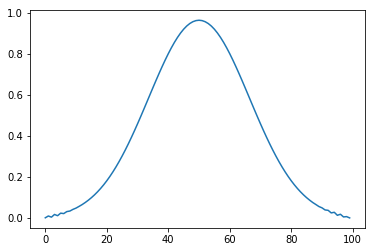

In [2]:
from matplotlib import cm
import matplotlib.pyplot as plt
import cmath, math
import numpy as np

NSTEP = input("Enter total number of domain steps:  ")  # Total number of domain steps 
NSTEP = int(NSTEP)
H = 1.0/NSTEP             # Spacing
phi = np.zeros(NSTEP)     # Space of PHI
diff = np.zeros(NSTEP)    # Space of Error

print("number of steps and H are", NSTEP, H)

### Function Arrangement
def gauss(x,t):
    return math.exp(-20.0 * (x-0.5)**2/(1.0+80*t))/math.sqrt(1.0+80*t)

def exact(x,t):
    return gauss(x,t) - gauss(x-1.0,t) - gauss(x+1.0,t)

### Calculation
time = input("Enter total time: ")
print("We recommend a time step as 0.5*h^2 such as %8.6f" % (0.5*(H**2)))
dt = input("Enter time step (0 to stop): ")
print("time step and time are:", dt, time)

dt = float(dt); time = float(time)

if dt == 0:
    print("dt is zero and program is stopping")
    quit()
    
NITER=int(time/dt)
dth=dt/H**2
t=0; phi[0]=0 ; phi[NSTEP-1]=0

for i in range(0, NSTEP-1):
    phi[i]=exact(i*H, t)
print(phi)

for i in range(0,NITER):
    pold=0
    for j in range(0, NSTEP-1):
        pnew=phi[j] + dth*(pold + phi[j+1] - 2*phi[j])
        pold=phi[j]
        phi[j]=pnew
        diff[j]=phi[j]-exact(j*H,t)

### Visualization 
fig = plt.figure()
fig1 = fig.add_subplot(111)
fig1.plot(range(0,NSTEP), phi)
plt.show()
